Title: 


Introduction:
* Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
* Clearly state the question you will try to answer with your project
* Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:
* Demonstrate that the dataset can be read from the web into R 
* Clean and wrangle your data into a tidy format
* Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
* Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


Methods:
* Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
* Describe at least one way that you will visualize the results


Expected outcomes and significance:
* What do you expect to find?
* What impact could such findings have?
* What future questions could this lead to?

<h1>Relationship between Features of Wine and Quality Rating</h1>

<h3>Introduction</h3>

<h3>Preliminary exploratory data analysis</h3>

For relevant documentation and details of dataset, reference [documentation](https://doi.org/10.1016/j.dss.2009.05.016)

<h4>Units of data</h4>

|Variable|Units|
|--|--|
|Fixed acidity|g<sub>(tartaric acid)</sub>/dm<sup>3</sup>|
|Volatile acidity|g<sub>(acetic acid)</sub>/dm<sup>3</sup>|
|Citric acid|g/dm<sup>3</sup>|
|Residual sugar|g/dm<sup>3</sup>|
|Chlorides|g<sub>(sodium chloride)</sub>/dm<sup>3</sup>|
|Free sulfur dioxide|mg/dm<sup>3</sup>
|Total sulfur dioxide|mg/dm<sup>3</sup>|
|Density|g/cm<sup>3</sup>
|pH|0-14 pH scale|
|Sulphates|g<sub>(potassium sulphate)</sub>/dm<sup>3</sup>|
|Alcohol|vol. %|
|Quality|0-10 scale|


The code block below will include:
- Reading dataset from web link
- Cleaning and wrangling data into a tidy format
- Splitting into training data and test data
- Statistics of training subset
- Visualizing training data comparing distributions of predictor variables

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


[1] "Number of null values:  0"

[1] "Number of N/A values:  0"

 fixed_acidity    volatile_acidity  citric_acid     residual_sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3900   1st Qu.:0.0925   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2600   Median : 2.200  
 Mean   : 8.348   Mean   :0.5268   Mean   :0.2728   Mean   : 2.539  
 3rd Qu.: 9.300   3rd Qu.:0.6400   3rd Qu.:0.4375   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
   chlorides          free_so2       total_so2         density      
 Min.   :0.01200   Min.   : 1.00   Min.   :  6.00   Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00   1st Qu.: 22.00   1st Qu.:0.9956  
 Median :0.07900   Median :14.00   Median : 38.00   Median :0.9968  
 Mean   :0.08801   Mean   :15.91   Mean   : 46.33   Mean   :0.9968  
 3rd Qu.:0.09100   3rd Qu.:22.00   3rd Qu.: 61.00   3rd Qu.:0.9979  
 Max.   :0.61100   Max.   :72.00   Max.   :289.00   Max.   :1.0031  
       pH          sulphates      

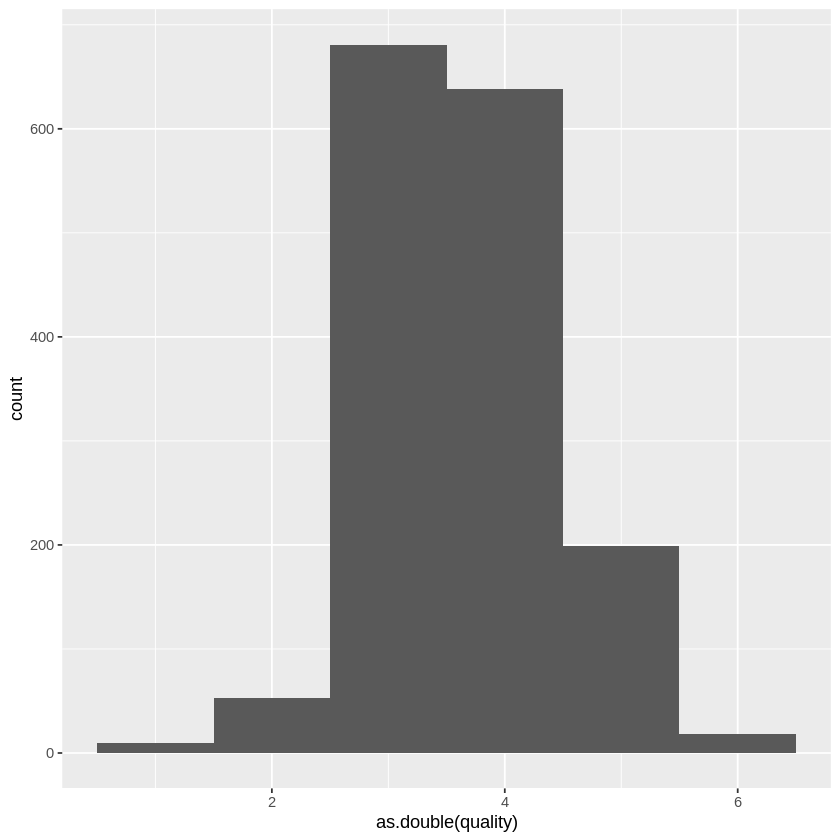

In [6]:
library(tidyverse)
library(tidymodels)

#read data frame from UCI machine learning database
red_wine_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine_data <- read_delim(red_wine_link, ";")

#rename column names for easier reference
colnames(red_wine_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", 
                             "residual_sugar", "chlorides", "free_so2", "total_so2",
                             "density", "pH", "sulphates", "alcohol", "quality")

#convert quality to factor type
red_wine_data <- mutate(red_wine_data, quality = as_factor(quality))

head(red_wine_data)

#set seed for consistency
set.seed(8888)

#splitting data set into training and testing subsets
SPLIT_PROPORTION = 0.75
red_split_data <- initial_split(red_wine_data, prop = SPLIT_PROPORTION, strata = quality)
red_training_data <- training(red_split_data)
red_testing_data <- testing(red_split_data)

#check for null/na data
paste("Number of null values: ", sum(is.null(red_training_data)))
paste("Number of N/A values: ", sum(is.na(red_training_data)))

summary(red_training_data)

#plotting the distribution of red wine quality

red_quality_histogram <- ggplot(red_wine_data, aes(x = as.double(quality))) +
    geom_histogram(binwidth = 1) +
    labs(x = "Quality of Red Wine", y = "Number of Wine") + 
    title("test") +
    

red_quality_histogram

Methods: 

Expected outcomes and significance:

We expect to find that a moderate balance of alcohol features (residual sugar, pH, density, etc.,) will lead to the highest quality rating of alcohol. Alcohol with extremely strong or weak features will subsequently lead to a lower quality rating.

By determining what chemical features lead to a higher quality rating of alcohol, wine makers will be able to concoct a specific type of alcohol that will be well-received by an audience. Furthermore, with this formula, wine makers will be able to create a type of alcohol that they can assume will be successful without have to physically taste the wine.

This can also raise further questions of whether the features of wine that are correlated to a higher quality rating can be applied to other types of alcohol (eg. beer, tequila, vodka). In other words, are the specific levels of wine features (residual sugar, pH, density, etc.,) that are correlated with a higher quality rating the same feature levels for all types of alcohol? Is this a trend we can apply to all types of alcohol?